In [32]:
## Import Dependencies 

import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import linear_model
import import_ipynb
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

## Import Functions from other Jupyter Notebooks

from Garrett_notebook import scatter_graph
from Harry_notebook import bar_plt
from Mike_notebook import bubble1, bubble2

In [33]:
## Import all clean data
gov_corruption_df = pd.read_csv('clean data/cpi_2019.csv')
generosity_df = pd.read_csv('clean data/global_generosity_score.csv')
human_freedom_df = pd.read_csv('clean data/hf_score.csv')
life_expectancy_df = pd.read_csv('clean data/lifeexp.csv')
education_df = pd.read_csv('clean data/clean_edu.csv')
gdp_df = pd.read_csv('clean data/Updated_GDP.csv')
happy_df = pd.read_csv('clean data/happy_score.csv')

In [34]:
## Clean up happy score dataframe for merge
happy_df = happy_df.rename(columns={'Country or region':'Country','Score':'Happiness Score'})
#happy_df

In [35]:
## Clean up generosity dataframe for merge
generosity_df = generosity_df.drop('Unnamed: 0',axis=1)
clean_gen_df = generosity_df.rename(columns={'country':'Country','overallScore':'Generosity Score'})
clean_gen_df = clean_gen_df.sort_values('Country')
clean_gen_df = clean_gen_df.reset_index(drop=True)
clean_gen_df

,Country,Generosity Score
0,Afghanistan,31
1,Albania,23
2,Argentina,28
3,Armenia,21
4,Australia,56
...,...,...
122,Venezuela,23
123,Vietnam,26
124,Yemen,17
125,Zambia,39


In [36]:
## Clean up corruption dataframe for merge
clean_corrupt_df = gov_corruption_df.sort_values('Country')
clean_corrupt_df = clean_corrupt_df.reset_index(drop=True)
clean_corrupt_df

,Country,Region,CPI score 2019
0,Afghanistan,AP,16
1,Albania,ECA,35
2,Algeria,MENA,35
3,Angola,SSA,26
4,Argentina,AME,45
...,...,...,...
175,Venezuela,AME,16
176,Vietnam,AP,37
177,Yemen,MENA,15
178,Zambia,SSA,34


In [37]:
## Clean up gdp dataframe for merge
gdp_df = gdp_df.rename(columns={'Country Name':'Country','Country Code':'Region','2019':"GDP"})
gdp_df = gdp_df[['Country',"GDP"]]
gdp_df


,Country,GDP
0,Afghanistan,507.103432
1,Angola,2790.726615
2,Albania,5353.244856
3,Andorra,40886.391165
4,Arab World,6584.740241
...,...,...
225,Kosovo,4417.524062
226,"Yemen, Rep.",774.334490
227,South Africa,6001.400814
228,Zambia,1305.063254


In [38]:
## Clean up freedom dataframe for merge
human_freedom_df = human_freedom_df.rename(columns={'countries':'Country','region':'Region','hf_score':'Human Freedom Score'})
human_freedom_df

,Country,Human Freedom Score
0,Albania,7.81
1,Algeria,5.20
2,Angola,5.48
3,Argentina,7.05
4,Armenia,7.69
...,...,...
157,"Venezuela, RB",4.08
158,Vietnam,6.25
159,"Yemen, Rep.",4.17
160,Zambia,6.71


In [39]:
## Clean up education dataframe for merge
education_df = education_df.rename(columns={'Data Source':'Country','Rate':'Education'})
education_df

,Country,Education
0,Aruba,100.401482
1,Afghanistan,53.038544
2,Angola,NaN
3,Albania,94.153337
4,Andorra,NaN
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",51.112486
261,South Africa,80.401043
262,Zambia,54.768871


In [40]:
## merge dataframes into final data frame for analysis
merge_1 = pd.merge(clean_corrupt_df,clean_gen_df,how='outer',on='Country')
merge_2 = pd.merge(merge_1,human_freedom_df,how='outer',on='Country')
merge_3 = pd.merge(merge_2,life_expectancy_df,how='outer',on='Country')
merge_4 = pd.merge(merge_3,education_df,how='outer',on='Country')
merge_5 = pd.merge(merge_4,gdp_df,how='outer',on='Country')
final_data_df = pd.merge(merge_5,happy_df,how='outer',on='Country')
final_data_df

,Country,Region,CPI score 2019,Generosity Score,Human Freedom Score,Life Expectancy,Education,GDP,Happiness Score
0,Afghanistan,AP,16.0,31.0,NaN,63.2,53.038544,507.103432,3.203
1,Albania,ECA,35.0,23.0,7.81,78.0,94.153337,5353.244856,4.719
2,Algeria,MENA,35.0,NaN,5.20,77.1,81.234412,3973.964072,5.211
3,Angola,SSA,26.0,NaN,5.48,63.1,NaN,2790.726615,NaN
4,Argentina,AME,45.0,28.0,7.05,76.6,89.302147,9912.281809,6.086
...,...,...,...,...,...,...,...,...,...
304,Ivory Coast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.944
305,Congo (Brazzaville),NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.812
306,Palestinian Territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.696
307,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.418


In [41]:
## Organize and define columns
final_data_df = final_data_df[['Country','Region','Happiness Score','CPI score 2019','Generosity Score',
                               'Human Freedom Score','Life Expectancy','Education','GDP']]

## Drop Countries with NaN in columns
final_data_df = final_data_df.dropna(axis=0,how='any')

## Use this data frame for analysis
final_data_df = final_data_df.reset_index(drop=True)

## Use this data frame for visualization
formatted_data_df = final_data_df.reset_index(drop=True)

In [42]:
formatted_data_df['Education'] = formatted_data_df['Education'].apply(lambda x: "{:.2f}%".format((x/1)))
formatted_data_df['GDP'] = formatted_data_df['GDP'].apply(lambda x: "${:.2f}k".format((x/1000)))
formatted_data_df

,Country,Region,Happiness Score,CPI score 2019,Generosity Score,Human Freedom Score,Life Expectancy,Education,GDP
0,Albania,ECA,4.719,35.0,23.0,7.81,78.0,94.15%,$5.35k
1,Argentina,AME,6.086,45.0,28.0,7.05,76.6,89.30%,$9.91k
2,Armenia,ECA,4.559,42.0,21.0,7.69,76.0,90.51%,$4.62k
3,Austria,WE/EU,7.246,77.0,45.0,8.45,81.6,97.13%,$50.14k
4,Azerbaijan,ECA,5.208,30.0,24.0,6.29,71.4,86.94%,$4.79k
...,...,...,...,...,...,...,...,...,...
83,Ukraine,ECA,4.332,30.0,24.0,6.45,73.0,96.16%,$3.66k
84,United Arab Emirates,MENA,6.825,71.0,45.0,6.17,76.1,78.31%,$43.10k
85,United States,AME,6.892,69.0,58.0,8.44,78.5,104.12%,$65.30k
86,Zambia,SSA,4.107,34.0,39.0,6.71,62.5,54.77%,$1.31k


In [43]:
summary_df = final_data_df.describe()
summary_df

,Happiness Score,CPI score 2019,Generosity Score,Human Freedom Score,Life Expectancy,Education,GDP
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,5.477318,45.715909,32.386364,7.135114,73.755682,77.770292,15716.451022
std,1.066661,17.606131,9.628062,0.957498,6.821886,25.787760,21845.016762
min,3.334000,20.000000,16.000000,5.290000,59.600000,15.502936,411.552340
25%,4.552750,32.000000,24.750000,6.517500,68.675000,58.196241,1670.364002
50%,5.449500,41.000000,31.000000,7.045000,75.050000,89.023028,6306.250015
75%,6.230500,56.500000,39.000000,7.960000,79.300000,97.053737,19587.374693
max,7.769000,87.000000,58.000000,8.820000,83.400000,111.001115,114704.594171


In [44]:
plt.style.use('fivethirtyeight')
#print(plt.style.available)

## Graphs for Visualization

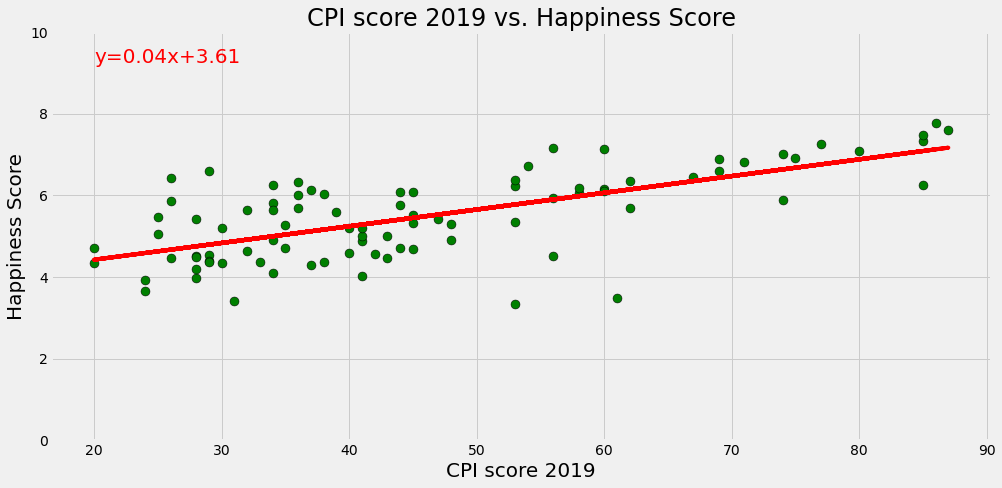



The r-value for CPI score 2019 is 0.676.


In [45]:
x=final_data_df['CPI score 2019']
y=final_data_df['Happiness Score']

scatter_graph(x,y)

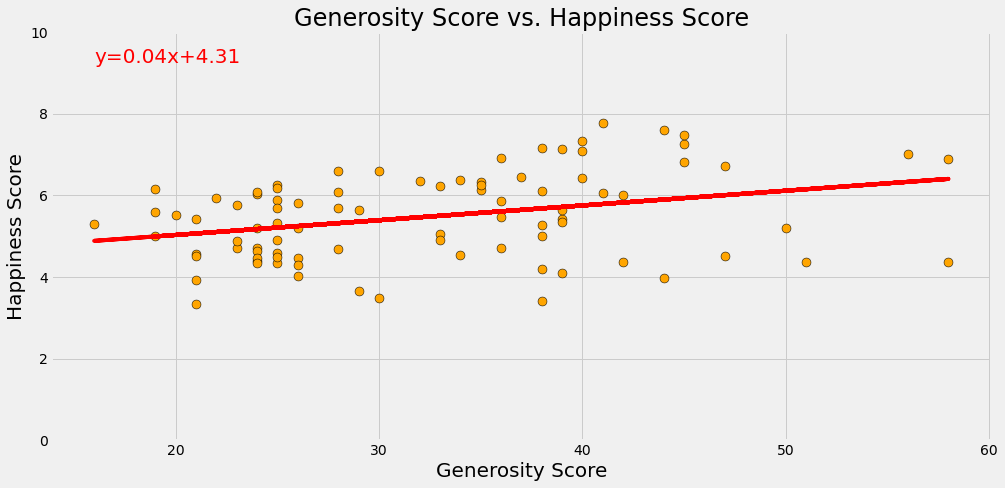



The r-value for Generosity Score is 0.326.


In [46]:
x=final_data_df['Generosity Score']
y=final_data_df['Happiness Score']

scatter_graph(x,y)

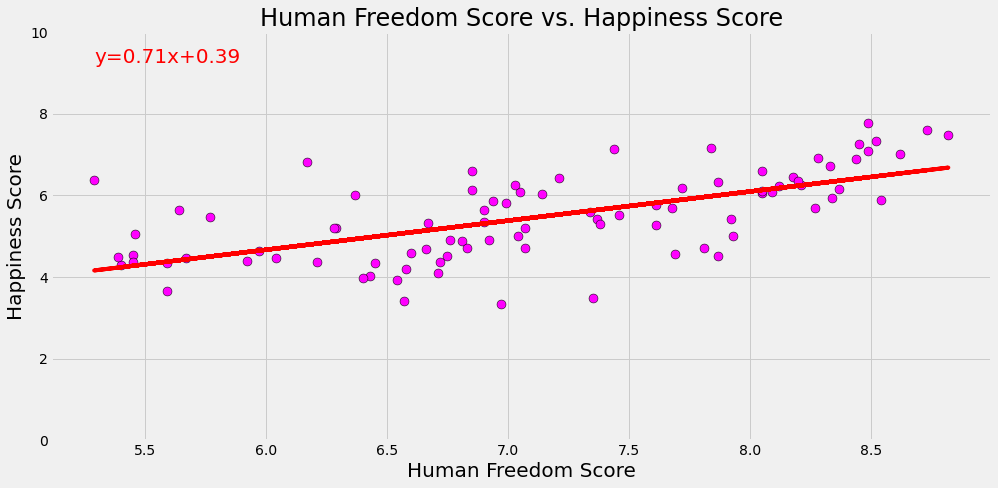



The r-value for Human Freedom Score is 0.641.


In [47]:
x=final_data_df['Human Freedom Score']
y=final_data_df['Happiness Score']

scatter_graph(x,y)

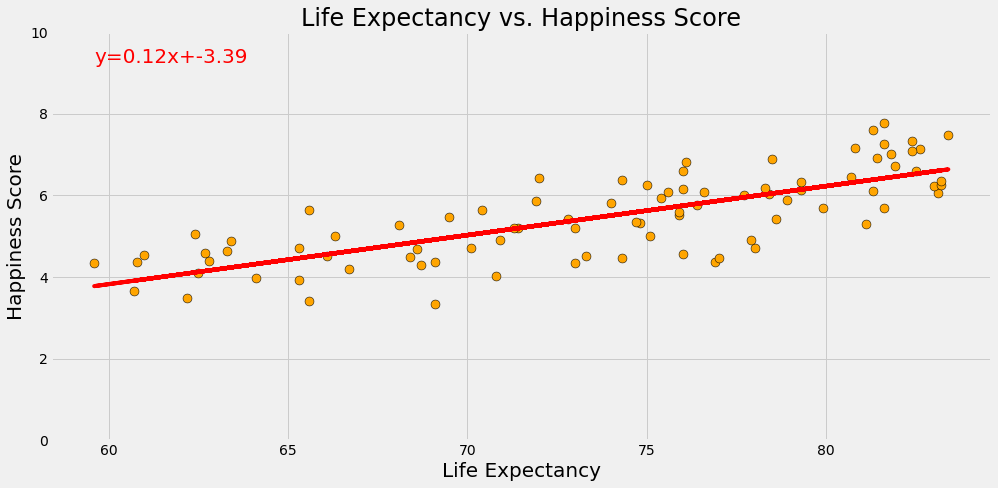



The r-value for Life Expectancy is 0.769.


In [48]:
x=final_data_df['Life Expectancy']
y=final_data_df['Happiness Score']

scatter_graph(x,y)

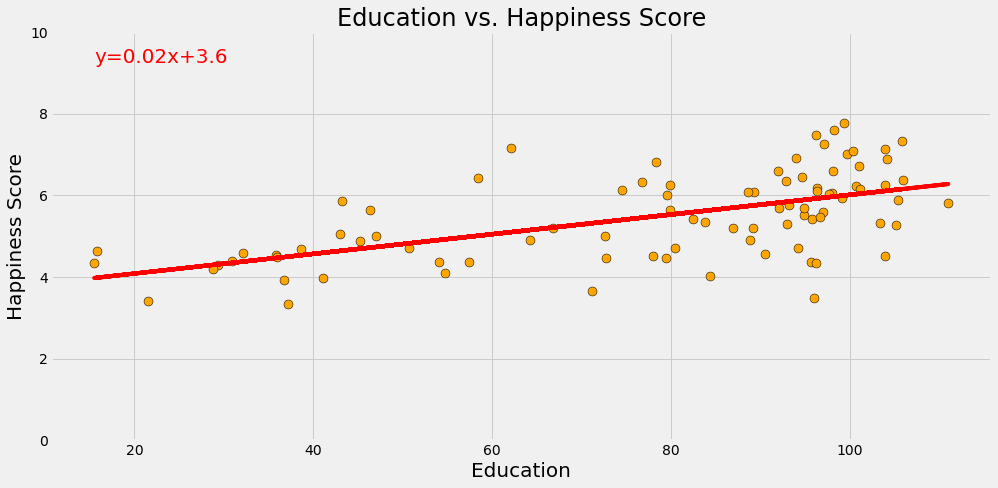



The r-value for Education is 0.583.


In [49]:
x=final_data_df['Education']
y=final_data_df['Happiness Score']

scatter_graph(x,y)


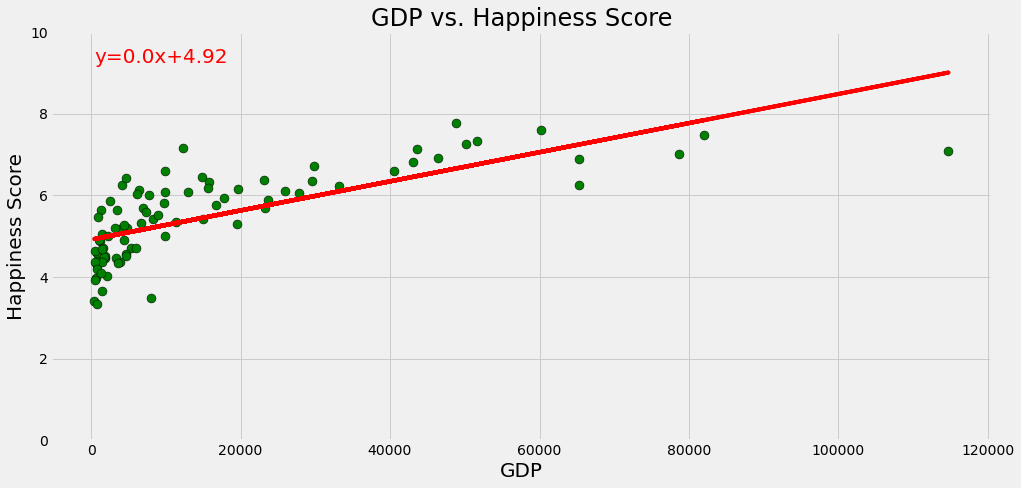



The r-value for GDP is 0.73.


In [50]:
x=final_data_df['GDP']
y=final_data_df['Happiness Score']

scatter_graph(x,y)

In [51]:
## import regression summary data frame for analysis

regress_summary_df = pd.read_csv('clean data/regression_summary.csv')
regress_summary_df

,Indicator,Slope,R-value
0,CPI score 2019,0.041,0.676
1,Generosity Score,0.036,0.326
2,Human Freedom Score,0.714,0.641
3,Life Expectancy,0.120,0.769
4,Education,0.024,0.583
5,GDP,0.000,0.730


### Call functions to plot various graphs

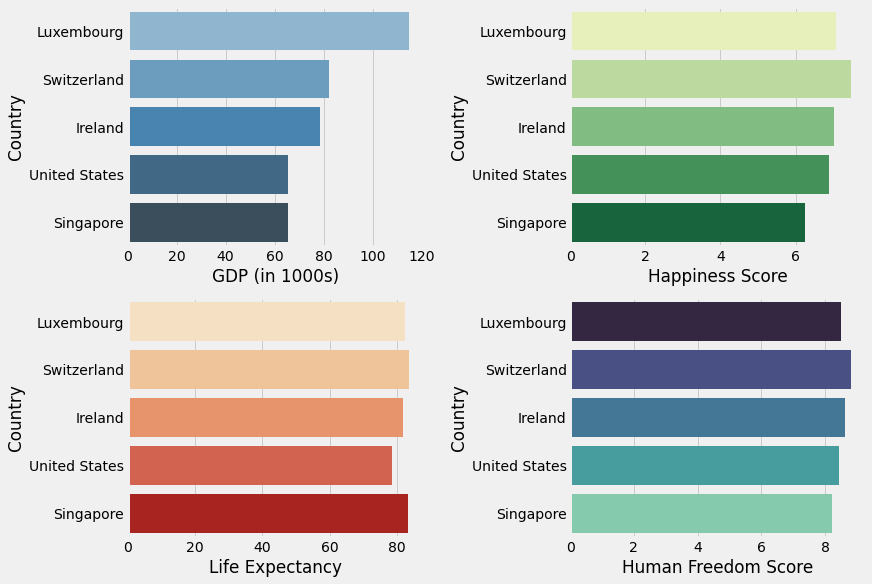

In [57]:
# Plotting Top 5 Countries in terms of GDP Per Capita to show GDP Per Capita, Happiness SCores, Life Expectancy
# and Human Freedom Score.
bar_plt(x,y)

In [58]:
# Plotting Life Expectancy vs. Human Freedom score where the size of the bubble for a country is based
# on the Happiness score.
bubble1()

In [60]:
# Plotting Generosity vs. Corruption Perception Index where the size of the bubble for a country is based
# on the Happiness score.
bubble2()

In [55]:
region_group_df = final_data_df.groupby('Region').mean()
region_group_df

,Happiness Score,CPI score 2019,Generosity Score,Human Freedom Score,Life Expectancy,Education,GDP
Region,,,,,,,
AME,6.256077,40.538462,34.692308,7.419231,77.015385,80.554375,12867.813394
AP,5.090769,38.692308,37.692308,6.658462,72.546154,80.321382,8433.064484
ECA,5.106200,38.100000,23.900000,7.034000,74.180000,97.457719,5679.354542
MENA,5.819000,52.666667,32.166667,6.356667,76.816667,81.963644,20127.040384
SSA,4.298773,34.318182,31.363636,6.319545,64.345455,45.198637,1593.192747
WE/EU,6.414417,64.208333,32.791667,8.223750,80.329167,95.486326,37230.427056


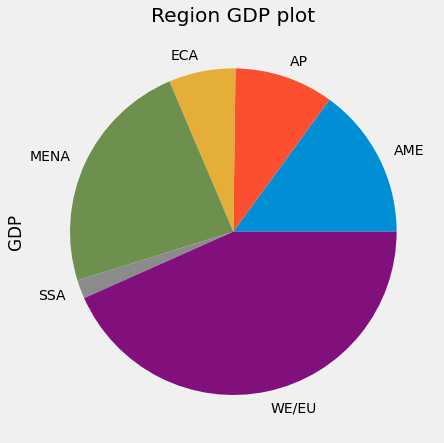

In [62]:
# Group by region to show GDP Per capita in each region

region_group_df.groupby('Region')['GDP'].agg(lambda x: sum(x)).plot(kind='pie',title='Region GDP plot',
                                                                             figsize=(20,7))
plt.show()

In [63]:
#scatter plot to show Happinesss vs LIfe expectancy corrlate with GDP.
# trace1

print('Happiness Score vs. Life Expectancy vs. GDP\nx = Happiness Score\ny = Life Expectancy\nz = GDP\n\n')
trace1 = go.Scatter3d(
    x=region_group_df['Happiness Score'],
    y=region_group_df['Life Expectancy'],
    z=region_group_df['GDP'],
    mode='markers',
    name = "Region Data",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
data = [trace1]
layout = go.Layout(
    title = 'Region Data',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Happiness Score vs. Life Expectancy vs. GDP
x = Happiness Score
y = Life Expectancy
z = GDP


